# Libraries for Neural Networks - PyTorch



In [1]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


## Loading the dataset

In [2]:
import torch
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn

In [3]:
breast = datasets.load_breast_cancer()
inputs = breast.data
outputs = breast.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=0)

## Data transformation


In [5]:
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

In [6]:
datasets = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(datasets, batch_size=10)

## Neural network structure

In [7]:
# 30 -> 16 -> 16 -> 1
network = nn.Sequential(nn.Linear(in_features=30, out_features=16), 
                        nn.Sigmoid(),
                        nn.Linear(16, 16),
                        nn.Sigmoid(),
                        nn.Linear(16, 1),
                        nn.Sigmoid())
print(network.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>


In [8]:
# BCELoss : used only binary problem
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001)
epochs = 1000
for epoch in range(epochs):
  running_loss=0.
  for data in train_loader:
    inputs, outputs = data
    # update weights every 10 datas
    optimizer.zero_grad()
    predictions = network.forward(inputs)
    loss = loss_function(predictions, outputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Epoch:', (epoch + 1), 'loss:', (running_loss/len(train_loader)))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch: 1 loss: 0.6464907993441042
Epoch: 2 loss: 0.6349070525687673
Epoch: 3 loss: 0.6159235219592634
Epoch: 4 loss: 0.5957607374243115
Epoch: 5 loss: 0.5750499581513198
Epoch: 6 loss: 0.5467029686855234
Epoch: 7 loss: 0.5185515005951342
Epoch: 8 loss: 0.48358053616855456
Epoch: 9 loss: 0.4494291336640068
Epoch: 10 loss: 0.41711469901644666
Epoch: 11 loss: 0.38919164823449176
Epoch: 12 loss: 0.35620920943177264
Epoch: 13 loss: 0.33107442959495215
Epoch: 14 loss: 0.3141840080852094
Epoch: 15 loss: 0.30140198864366696
Epoch: 16 loss: 0.2819196105651233
Epoch: 17 loss: 0.27917608456767123
Epoch: 18 loss: 0.2655731159383836
Epoch: 19 loss: 0.2601516473552455
Epoch: 20 loss: 0.25808134950373485
Epoch: 21 loss: 0.24117670337791028
Epoch: 22 loss: 0.24254191974582878
Epoch: 23 loss: 0.23958117903574652
Epoch: 24 loss: 0.2403298661760662
Epoch: 25 loss: 0.2559158453798812
Epoch: 26 loss: 0.231861248774373
Epoch: 27 loss: 0.23712260778183522
Epoch: 28 loss: 0.23315359668239302
Epoch: 29 loss: 0

## Evaluate

In [9]:
network.eval()
predictions = network.forward(X_test)
predictions = np.array(predictions > 0.5)

In [10]:
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

0.9473684210526315
[[44  3]
 [ 3 64]]


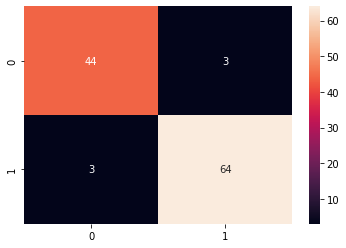

In [11]:
import seaborn as sns
sns.heatmap(cm, annot=True)